In [1]:
import pandas as pd
#df = pd.read_csv('https://raw.githubusercontent.com/datagy/data/main/insurance.csv')
#print(df.head())


In [2]:
# reading/writing pandas dataframe to csv file

#df.to_csv("Insurance-Charges.csv")
df=pd.read_csv("Insurance-Charges.csv")
print(df.shape)

(1338, 9)


In [7]:
# Exploring the dataset

print(df.shape)

print(df.info())

(1338, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1338 non-null   int64  
 1   Unnamed: 0.1  1338 non-null   int64  
 2   age           1338 non-null   int64  
 3   sex           1338 non-null   object 
 4   bmi           1338 non-null   float64
 5   children      1338 non-null   int64  
 6   smoker        1338 non-null   object 
 7   region        1338 non-null   object 
 8   charges       1338 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 78.5+ KB
None


For this tutorial, you’ll be exploring the relationship between the first six variables and the charges variable

In [8]:
print(df.describe())

        Unnamed: 0  Unnamed: 0.1          age          bmi     children  \
count  1338.000000   1338.000000  1338.000000  1338.000000  1338.000000   
mean    668.500000    668.500000    39.207025    30.663397     1.094918   
std     386.391641    386.391641    14.049960     6.098187     1.205493   
min       0.000000      0.000000    18.000000    15.960000     0.000000   
25%     334.250000    334.250000    27.000000    26.296250     0.000000   
50%     668.500000    668.500000    39.000000    30.400000     1.000000   
75%    1002.750000   1002.750000    51.000000    34.693750     2.000000   
max    1337.000000   1337.000000    64.000000    53.130000     5.000000   

            charges  
count   1338.000000  
mean   13270.422265  
std    12110.011237  
min     1121.873900  
25%     4740.287150  
50%     9382.033000  
75%    16639.912515  
max    63770.428010  


# Exploring Correlation Using Pandas
One way that we can identify the strength of a relationship is to use the coefficient of correlation. What is a Correlation Coefficient? A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables. The closer the value is to 1 (or -1), the stronger a relationship. The closer a number is to 0, the weaker the relationship. A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, as does the other.

In [11]:
print(df.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


# Plotting a Pairwise Plot of the Data
A pairwise plot shows the relationship between pairs of variables. The plot shows a scatterplot of each pair of variables, allowing you to see the nuances of the distribution that simply looking at the correlation may not actually indicate. Let’s import seaborn and plot a pairwise plot using the .pairplot() function.

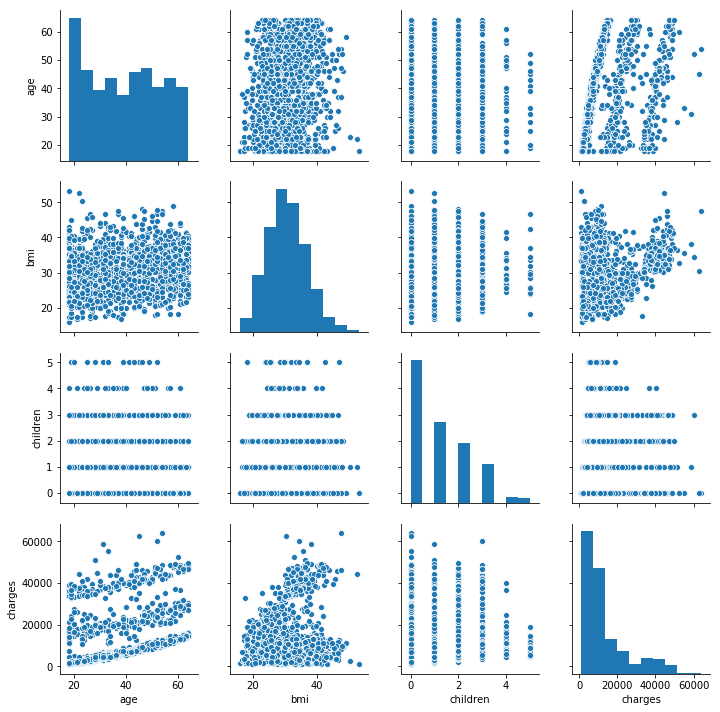

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

It looks like the data is fairly all over the place and those linear relationships may be harder to identify. However, if you look closely, you can see some level of stratification. For example, the pairplots for charges and age as well as charges and BMI show separate clusters of data.

Let’s see how we can apply some of the other categorical data to see if we can identify any nuances in the data. Because the smoker variable is a binary variable (either “yes” or “no”), let’s split the data by that variable. This can be done by passing in the hue= parameter

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


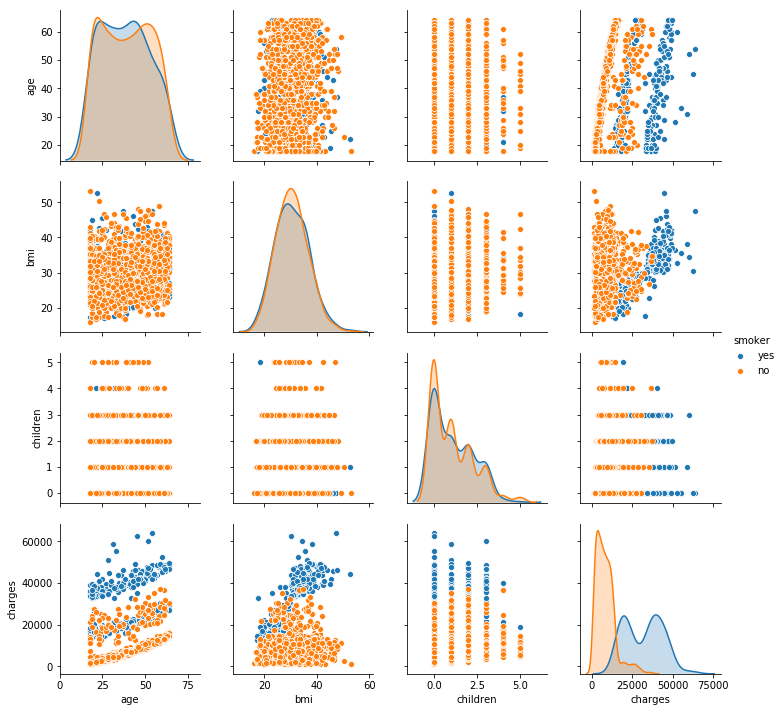

In [14]:
sns.pairplot(df, hue='smoker')
plt.show()

From this, you can see that there are clear differences in the charges of clients that smoke or don’t smoke. Let’s take a closer look at the relationship between the age and charges variables. This can be done using the relplot() function in Seaborn.

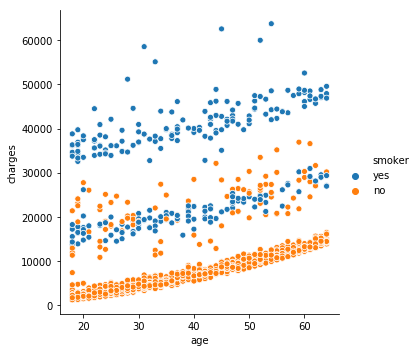

In [16]:
sns.relplot(data=df, x='age', y='charges', hue='smoker')
plt.show()

This is great! Aside from a few outliers, there’s a clear, linear-looking, trend between the age and charges for non-smokers. Remember, when you first calculated the correlation between age and charges was the strongest, but it was still a weak relationship. Now that you know that smoking is a strong determinant in charges, let’s filter the DataFrame to only non-smokers and see if this makes a difference in correlation.

In [18]:
non_smokers = df[df['smoker'] == 'no']
print(non_smokers.corr())

               age       bmi  children   charges
age       1.000000  0.122638  0.033395  0.627947
bmi       0.122638  1.000000  0.019208  0.084037
children  0.033395  0.019208  1.000000  0.138929
charges   0.627947  0.084037  0.138929  1.000000


The correlation between age and charges increased from 0.28 to 0.62 when filtering to only non-smokers. Let’s focus on non-smokers for the rest of the tutorial, since we’re more likely to be able to find strong, linear relationships for them.

In [19]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# Getting help on the .fit() method
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



From the help documentation, you can see that the method expects two arrays: X and y. X is expected to be a two-dimensional array (as denoted by the capital X), while y is expected to be one-dimensional.

As with other machine-learning models, X will be the features of the dataset, while y will be the target of the dataset. In this case, we’ll start off by only looking at a single feature: age. Let’s convert age to a DataFrame and parse out charges into a Series.

In [24]:
# Creating two arrays for the feature and target
X = non_smokers[['age']]
y = non_smokers['charges']
print(X.shape)
print(y.shape)

# Checking the type of our arrays
print('The type of X is ', type(X))
print('The type of y is ', type(y))


(1064, 1)
(1064,)
The type of X is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [47]:
# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

Now that our datasets are split, we can use the .fit() method to fit our data. Let’s pass these variables in to create a fitted model. We’ll use the training datasets to create our fitted model.

In [48]:
# Fitting our model
model.fit(X_train, y_train)

LinearRegression()

Scikit-learn comes with all of these evaluation metrics built-in. We can import them from the metrics module. Let’s load them, predict our values based on the testing variables, and evaluate the effectiveness of our model.

In [49]:
# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_train)
rmse = mean_squared_error(y_train, predictions, squared=False)
print('The rmse-train is: ', rmse)

predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The rmse-test is: ', rmse)

The rmse-train is:  4622.485729481957
The rmse-test is:  4685.811175063216


In [ ]:
#reproducing the same results by fixing random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3,random_state=42)

In [ ]:
Lab Assignments:
    
1. Implement Linear Regression on Boston House Price Dataset.
2. implement Logistic regression on Iris Dataset